# S6: Introdução ao Python

## Problema 1: Funções

Fazer uma função **chamada amplitude** em que deve receber uma lista e imprima a amplitude. **(A amplitude é a diferença entre o maior e o menor número de um conjunto de valores).**

In [22]:
lista = [1,22,5,6,8]
def amplitude():
    return (max(lista) + min(lista))

amplitude()

23

In [23]:
list0 = []
n = int(input('Vamos fazer uma lista. Digite abaixo o número que elementoe que você quer que tenha nessa lista:'))
for i in range(0, n):
        listu = int(input())
        
        list0.append(listu)
        
print(list0)
        
def amplitude(l):
    return(max(list0) + min(list0))
x = amplitude(list0)
print(x)

Vamos fazer uma lista. Digite abaixo o número que elementoe que você quer que tenha nessa lista:3
5
2
22
[5, 2, 22]
24


## Problema 2: Funções

Fazer uma função que recebe uma string e retorna esta na vertical.

In [40]:
def strv(texto):
    for i in range(0,len(texto)):
        print(texto[i])

strv('bola')

    

b
o
l
a


## Problema 3: Estrutura Condicional

Criar um programa que leia um peso de uma carga em números inteiros. Se o peso for até 10kg informe que o valor será 50 reais. Se for entre 11 e 20 kg, informe que o valor será 80 reais. E se for maior que 20kg o transporte não será aceito.

In [7]:
peso = int(input('Insira o valor em kilos da carga:'))
if peso < 10:
    print('O valor pago deverá ser de R$ 50,00')
if peso >= 11 and peso <= 20:
    print('O valor pago será de R$ 80,00')
if peso > 20:
    print('O transporte não será aceito.')

Insira o valor em kilos da carga:21
O transporte não será aceito.


# S10: Limpeza e Tratamento de Dados


- Problema Geral: 
    > Será dado um aqruivo com dados para análise e tratamento deles.

In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [4]:
dataset = pd.read_csv('tempo.csv', sep=';')
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [6]:
dataset.shape

(14, 5)

## Observações e passo a passo

- Do banco de dado acima temos que:
 - O banco de dados tem 14 linhas (vemos apenas 5 linhas) e 5 colunas
 - Dados categóricos: Aparência | Vento | Jogar
 - Dados numéricos: Temperatura | Umidade
<br>
- Vamos analisar na seguinte ordem: <br>
 **1º Categóricos**: Aparencia > Vento > Jogar <br>
 **2º Numéricos**: Temperatura > Umidade <br>
 - Depois da análise, segue tratamento em mesma ordem
 

### Análises 

#### Aparência

In [5]:
agrupado = dataset.groupby(['Aparencia']).size() #filtro resummo
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

- Nesse resumo consta um elemento chamado 'menos'. Fora do domínio. Verificando em gráfico:

<AxesSubplot:xlabel='Aparencia'>

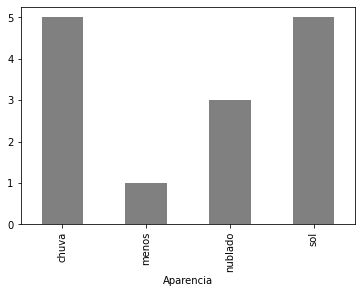

In [7]:
agrupado.plot.bar(color = 'gray') #gera gráfico em barra

#### Vento

In [8]:
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<AxesSubplot:xlabel='Vento'>

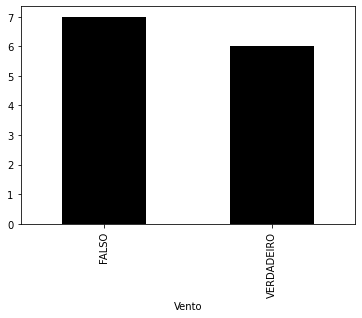

In [11]:
agrupado.plot.bar(color = 'black')

#### Jogar

In [13]:
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<AxesSubplot:xlabel='Jogar'>

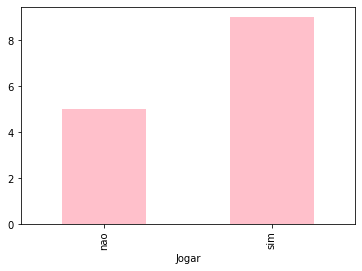

In [15]:
agrupado.plot.bar(color = 'pink')

#### Temperatura

In [16]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

- Observando a **mean** e o **50%**, é possível verificar uma distância entre esses valores.

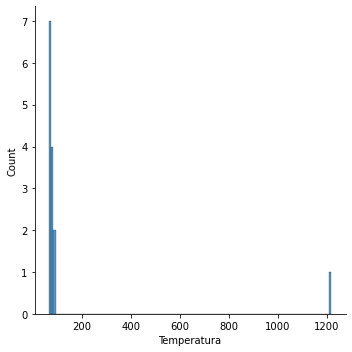

In [35]:
srn.displot(dataset['Temperatura'])

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperatura'>

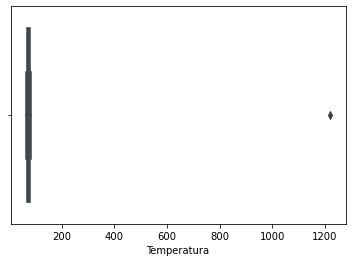

In [34]:
srn.boxplot(dataset['Temperatura'])

#### Umidade

In [36]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

- **mean** e **50%** não estão tão distantes

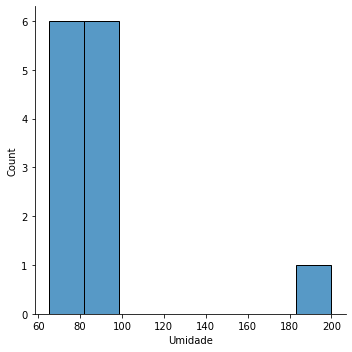

In [58]:
srn.displot(dataset['Umidade'])

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

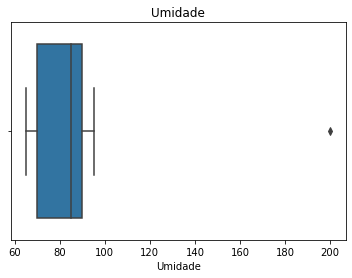

In [57]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')
#set_title('Umidade') põe o título 'Umidade' acima do gráfico

- No gráfico **boxplot** é possível ver um dado outlines.

#### Valores Nulos NAN

In [59]:
#Soma quantidade de valores núlo de cada coluna
dataset.isnull().sum() 

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

- Dado que há valores nulos, na coluna Umidade e Vento. 

### Tratamento

#### Aparência

 - Como visto no tópico 2.1.1.1, dentro dos valores 'Aparência' aparece um valor 'fora de domínio'. Que é o **menos**. 
 - A ideia é substotuí-lo pela moda.

In [61]:
agrupado = dataset.groupby('Aparencia').size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

- A moda é Chuva ou Sol. Vamos colocar Sol por imaginar que **para o negócio** é interessante que se faça sol para que se possa jogar. Sendo positivos e contando com a positividade do clima. 
- **Para um caso real**, talvez fosse necessário analizar o **histórico** do clima da região nos últimos anos pars o período especificado, e poder escolher entre um ou o outro.

In [63]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
agrupado = dataset.groupby('Aparencia').size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

#### Temperatura

- Como visto no ponto 2.1.1.4, o valor máximo da temperatura excete os +130F. Precisamos **ajustar o domínio** da temperatura, **levando os valores que estão fora do domínio para o valor que representa a mediana.**

In [73]:
dataset.loc[(dataset['Temperatura'] > -130) | (dataset['Temperatura'] < 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,sol,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [75]:
mediana = sts.median(dataset['Temperatura']) #código para calcular mediana pelo pacote statistics. para coluna de 'Temp'
mediana

73.5

In [78]:
#Substituição dos dados abaixo de -130 e acima de 130 da coluna 'Temperatura' para mediana.
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana
dataset.loc[(dataset['Temperatura'] <-130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


#### Umidade

- Como visto no ponto 2.1.1.5, existem valores que excedem o limiar superior que é de 100. 
- Imitando o procedimento anterior temos que :

In [79]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,73.5,200.0,NaN,sim


In [80]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [83]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


- Como visto no tópico 2.1.1.6, a coluna 'Umidade' possui valores nulos

In [87]:
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0    1
70.0    3
75.0    1
80.0    1
85.0    1
85.5    1
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

In [88]:
dataset['Umidade'].isnull().sum() #retorna a soma da quantidade de elementos nulos

1

In [90]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [92]:
dataset['Umidade'].fillna(mediana, inplace=True) #subsitui o valor nulo pela mediana
dataset['Umidade'].isnull().sum()

0

#### Vento

- Como visto no tópico 2.1.1.2, a coluna vento retorna se é 'Verdadeiro' ou 'Falso'. Então, trata-se de um dado categórico. 
- Não há valores fora de domínio (fora de 'Verdadeiro' ou 'Falso'). 
- **Precisamos verificar se há dados nulos**, e havendo, transformá-lo na moda (visto que é um dado categórico). 

In [97]:
dataset['Vento'].isnull().sum() 

1

In [98]:
dataset['Vento'].fillna('FALSO', inplace=True)
dataset['Vento'].isnull().sum()

0